In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file
data = pd.read_csv('output.csv')

In [3]:
# 1. Segment Overview
print("Number of customers in each segment:")
print(data['Segment'].value_counts())


Number of customers in each segment:
Segment
0    1153
1     544
Name: count, dtype: int64


In [4]:
# 2. Income and Spending Analysis
for segment in data['Segment'].unique():
    segment_data = data[data['Segment'] == segment]
    print(f"\nSegment {segment}:")
    print("Income:")
    print(f"Mean: {segment_data['Income'].mean():.2f}")
    print(f"Median: {segment_data['Income'].median():.2f}")
    
    for col in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
        print(f"{col}:")
        print(f"Mean: {segment_data[col].mean():.2f}")
        print(f"Median: {segment_data[col].median():.2f}")


Segment 0:
Income:
Mean: 36416.33
Median: 36317.00
MntWines:
Mean: 68.01
Median: 26.00
MntFruits:
Mean: 4.94
Median: 3.00
MntMeatProducts:
Mean: 27.53
Median: 16.00
MntFishProducts:
Mean: 7.06
Median: 3.00
MntSweetProducts:
Mean: 4.94
Median: 2.00
MntGoldProds:
Mean: 17.35
Median: 11.00

Segment 1:
Income:
Mean: 65165.24
Median: 65324.00
MntWines:
Mean: 562.02
Median: 526.00
MntFruits:
Mean: 29.40
Median: 23.00
MntMeatProducts:
Mean: 222.58
Median: 171.50
MntFishProducts:
Mean: 44.63
Median: 34.00
MntSweetProducts:
Mean: 29.76
Median: 24.00
MntGoldProds:
Mean: 51.17
Median: 41.00


In [5]:
# 3. Demographic Analysis
for segment in data['Segment'].unique():
    segment_data = data[data['Segment'] == segment]
    print(f"\nSegment {segment}:")
    print("Education:")
    print(segment_data['Education'].value_counts())
    print("Marital Status:")
    print(segment_data['Marital_Status'].value_counts())
    print("Age Distribution:")
    print(segment_data['Year_Birth'].describe())


Segment 0:
Education:
Education
Graduation      561
PhD             220
Master          206
Foundational    166
Name: count, dtype: int64
Marital Status:
Marital_Status
Relationship    754
Single          399
Name: count, dtype: int64
Age Distribution:
count    1153.000000
mean     1970.813530
std        10.974438
min      1940.000000
25%      1963.000000
50%      1972.000000
75%      1978.000000
max      1996.000000
Name: Year_Birth, dtype: float64

Segment 1:
Education:
Education
Graduation      243
PhD             176
Master           94
Foundational     31
Name: count, dtype: int64
Marital Status:
Marital_Status
Relationship    350
Single          194
Name: count, dtype: int64
Age Distribution:
count     544.000000
mean     1965.735294
std        11.696112
min      1943.000000
25%      1956.000000
50%      1966.000000
75%      1974.000000
max      1995.000000
Name: Year_Birth, dtype: float64


In [6]:
# 4. Engagement Analysis
for segment in data['Segment'].unique():
    segment_data = data[data['Segment'] == segment]
    print(f"\nSegment {segment}:")
    print("Recency:")
    print(f"Mean: {segment_data['Recency'].mean():.2f}")
    print(f"Median: {segment_data['Recency'].median():.2f}")
    
    for col in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
        print(f"{col}:")
        print(f"Mean: {segment_data[col].mean():.2f}")
        print(f"Median: {segment_data[col].median():.2f}")


Segment 0:
Recency:
Mean: 48.91
Median: 49.00
NumDealsPurchases:
Mean: 2.27
Median: 2.00
NumWebPurchases:
Mean: 2.56
Median: 2.00
NumCatalogPurchases:
Mean: 0.66
Median: 1.00
NumStorePurchases:
Mean: 3.50
Median: 3.00
NumWebVisitsMonth:
Mean: 6.46
Median: 7.00

Segment 1:
Recency:
Mean: 49.08
Median: 51.00
NumDealsPurchases:
Mean: 2.38
Median: 2.00
NumWebPurchases:
Mean: 5.75
Median: 5.00
NumCatalogPurchases:
Mean: 4.22
Median: 4.00
NumStorePurchases:
Mean: 8.42
Median: 8.00
NumWebVisitsMonth:
Mean: 4.35
Median: 4.00


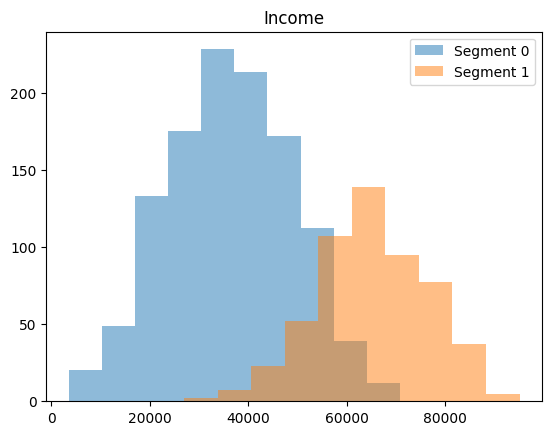

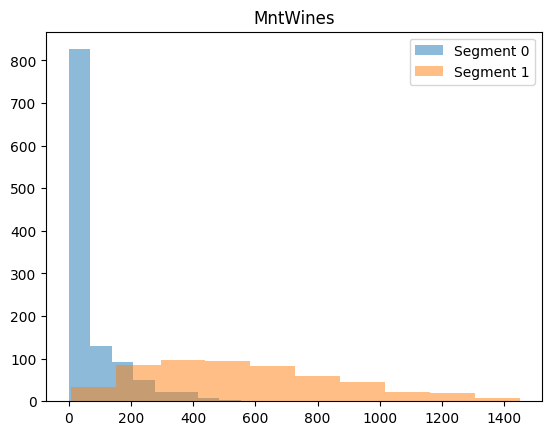

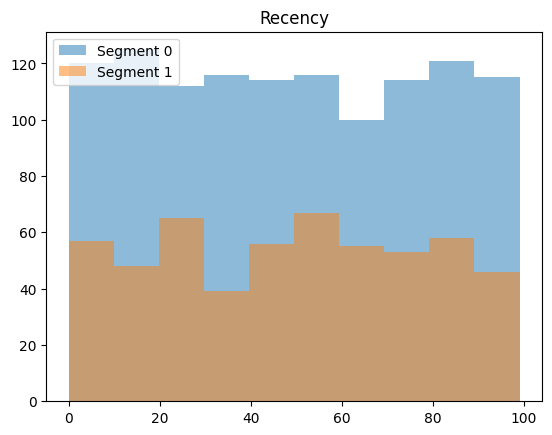

In [7]:
# 5. Visualization
for col in ['Income', 'MntWines', 'Recency']:
    plt.figure()
    for segment in data['Segment'].unique():
        segment_data = data[data['Segment'] == segment]
        plt.hist(segment_data[col], alpha=0.5, label=f'Segment {segment}')
    plt.title(col)
    plt.legend()
    plt.show()